***Bela Lisfatia-4222201064***

**Classification of handwritten characters using HOG Feature Extraction with Support Vector Machine (SVM) classifier**

**Dataset Preparation**

Create 2600 samples with 100 samples in each class to make the new file .csv

In [1]:
import pandas as pd

data = pd.read_csv('EMNIST Dataset/emnist-letters-train.csv', header=0)
data.shape

(88799, 785)

In [2]:
import pandas as pd

input_csv = "EMNIST Dataset/emnist-letters-train.csv"
output_csv = "EMNIST Dataset/new-emnist-letters-train.csv"

try:
    df = pd.read_csv(input_csv)
    label_column = "23"
    sampled_df = pd.DataFrame()
    
    # Process each class
    for label in range(1, 27):  # Class is 1-26
        # Filter data based on class
        class_data = df[df[label_column] == label]
        
        # Take 100 rows of data randomly for this class
        sampled_class_data = class_data.sample(n=100, random_state=42)  
        sampled_df = pd.concat([sampled_df, sampled_class_data])
    
    # Save the sampled data to a new file
    sampled_df.to_csv(output_csv, index=False)
    print(f"Successfully saved each 100 rows of data from each class into the file: {output_csv}")
except FileNotFoundError:
    print(f"File {input_csv} not found.")
except ValueError as e:
    print(f"Failed: {e}")
except Exception as e:
    print(f"Error occurred: {e}")


Successfully saved each 100 rows of data from each class into the file: EMNIST Dataset/new-emnist-letters-train.csv


**Library**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

**Load Dataset**

In [22]:
data_train = pd.read_csv('EMNIST Dataset/new-emnist-letters-train.csv', header=0)
data_test = pd.read_csv('EMNIST Dataset/emnist-letters-test.csv', header=0)

In [23]:
data_train.shape

(2600, 785)

**Visualize the Image**

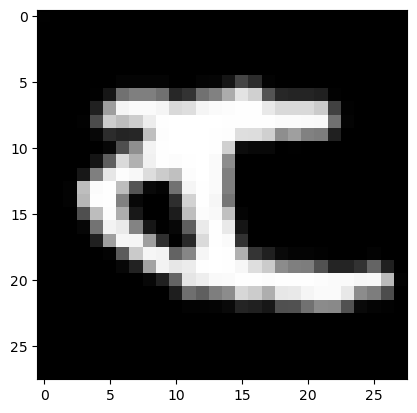

In [24]:
plt.imshow(data_train.iloc[8, :-1].values.reshape(28, 28), cmap='gray')

**Shuffle Datasets Before Processing**

In [25]:
data_train = shuffle(data_train, random_state=42)
data_test = shuffle(data_test, random_state=42)

In [26]:
X = data_train.iloc[:, 1:].values  # All coloumn as a feature except first column
y = data_train.iloc[:, 0].values  # First column as a label

# Split dataset to training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

**HOG Feature Extraction**

In [27]:
feature, hog_img = hog(data_train.iloc[1, :-1].values.reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [28]:
feature.shape

(144,)

<BarContainer object of 144 artists>

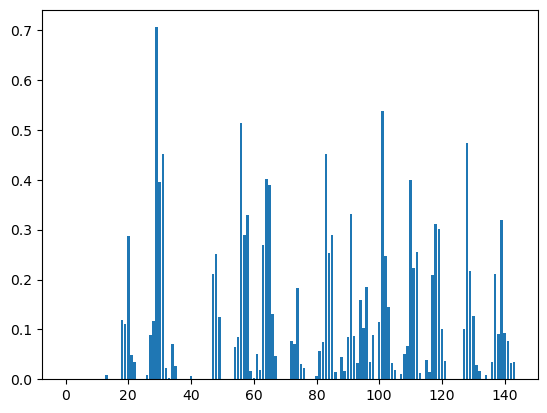

In [29]:
plt.bar(list(range(feature.shape[0])), feature)

In [30]:
feature, hog_img = hog(data_train.iloc[0, :-1].values.reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

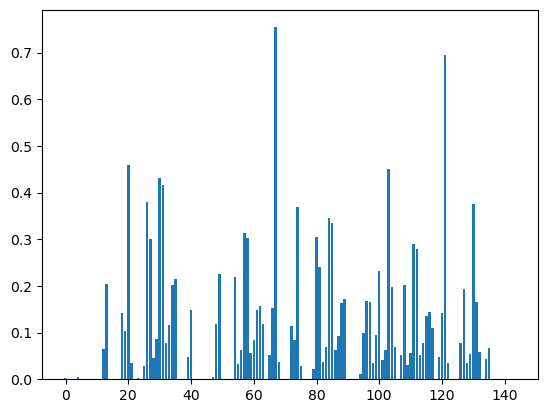

In [31]:
plt.bar(list(range(feature.shape[0])), feature)

In [32]:
n_dims = feature.shape[0]
n_dims

144

In [33]:
n_samples = data_train.shape[0]
n_samples

2600

In [34]:
X_train.shape

(2080, 784)

In [35]:
# Use the number of samples from X_train
# Reshape to 28x28
X_train_hog = np.zeros((X_train.shape[0], 144))  # 144 is the length of the HOG feature, X as a feature
y_train_hog = np.zeros(y_train.shape) #y as a label

for i in range(X_train.shape[0]):
    feature, _ = hog(X_train[i].reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    
    X_train_hog[i] = feature  
    y_train_hog[i] = y_train[i]  # Save label into y_train_hog

**Model Support Vector Machine (SVM) for classification**

In [36]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

**Evaluate on Train data using LOOCV**

In [37]:
loo = LeaveOneOut()
y_pred = cross_val_predict(svm_model, X_train_hog, y_train_hog, cv=loo)

In [38]:
print("\nLOOCV Results (Training Data):")
print("Confusion Matrix:")
print(confusion_matrix(y_train_hog, y_pred))
print("Accuracy:", accuracy_score(y_train_hog, y_pred))
print("Precision:", precision_score(y_train_hog, y_pred, average='weighted'))
print("Recall:", recall_score(y_train_hog, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_train_hog, y_pred, average='weighted'))


LOOCV Results (Training Data):
Confusion Matrix:
[[51  0  2  0  0  0  3  1  0  1  0  0  3  3  2  0  8  1  0  1  0  0  1  0
   0  2]
 [ 2 60  1  0  3  0  1  7  0  0  0  1  0  0  0  1  4  0  0  1  1  0  0  0
   0  0]
 [ 3  1 58  0  9  0  4  0  0  0  0  2  0  0  0  0  2  0  0  0  0  0  0  0
   0  0]
 [ 1  5  0 65  0  0  0  2  0  4  0  1  0  2  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  2  0 67  0  2  1  0  0  1  0  0  0  0  0  2  1  0  0  0  0  0  0
   0  1]
 [ 0  0  2  0  0 44  1  0  1  0  0  2  0  0  0  4  2  3  0  7  0  0  0  0
   0  0]
 [ 3  2  3  0  0  2 44  0  0  1  0  1  0  0  0  0 16  1  1  0  0  1  0  0
   1  0]
 [ 1  5  0  1  0  0  0 54  2  0  1  4  3  3  1  0  0  0  0  3  2  0  0  0
   0  1]
 [ 0  0  0  0  0  1  0  0 52  7  0 20  0  1  0  0  0  0  0  1  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0  1  0  9 65  0  1  0  0  0  0  0  0  1  5  0  0  0  0
   1  0]
 [ 0  1  1  0  0  0  0  2  0  0 69  2  0  0  0  1  0  3  0  0  0  0  0  1
   1  0]
 [ 0  0  3  0  0  0  0  0 24  0  0 52

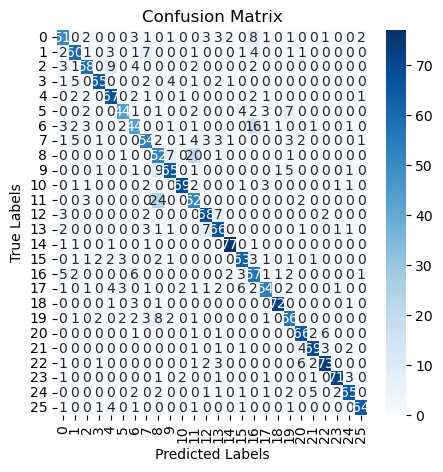

In [41]:
conf_mat = confusion_matrix(y_train_hog, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(conf_mat)), yticklabels=range(len(conf_mat)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Measure training performance Use Grid Search Techniques**

In [42]:
# Define parameters to search for
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['linear', 'rbf']}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',  
    verbose=2,  
    n_jobs=-1 
)

In [43]:
# Train GridSearchCV on HOG Data
grid_search.fit(X_train_hog, y_train_hog)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy:  0.7822115384615385


In [44]:
best_svm_model = SVC(**grid_search.best_params_)
best_svm_model.fit(X_train_hog, y_train_hog)

SVC(C=10, gamma=0.1)

**Evaluate on train datasets (80%) and Performance metrics**


GridSearchCV Results (Training Data):
Confusion Matrix:


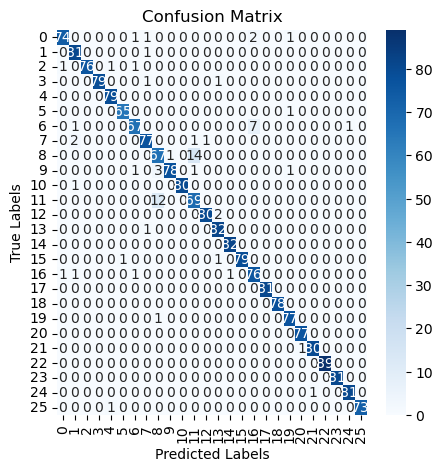

Accuracy: 0.9653846153846154
Precision: 0.966134708722544
Recall: 0.9653846153846154
F1 Score: 0.965539521310877


In [45]:
# Predictions on training data
y_train_pred = best_svm_model.predict(X_train_hog)
conf_mat = (confusion_matrix(y_train_hog, y_train_pred))

# Evaluation Matrix
print("\nGridSearchCV Results (Training Data):")
print("Confusion Matrix:")
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(conf_mat)), yticklabels=range(len(conf_mat)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_train_hog, y_train_pred))
print("Precision:", precision_score(y_train_hog, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train_hog, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train_hog, y_train_pred, average='weighted'))

**HOG Feature Extraction for Data Test**

In [46]:
X_test_hog = np.zeros((X_test.shape[0], 144))
for i in range(X_test.shape[0]):
    feature, _ = hog(X_test[i].reshape(28, 28), orientations=9, pixels_per_cell=(8, 8),
                     cells_per_block=(2, 2), visualize=True, block_norm='L2')
    X_test_hog[i] = feature

**Evaluate on testing datasets (20%) and Performance metrics**


GridSearchCV Results (Test Data):
Confusion Matrix:


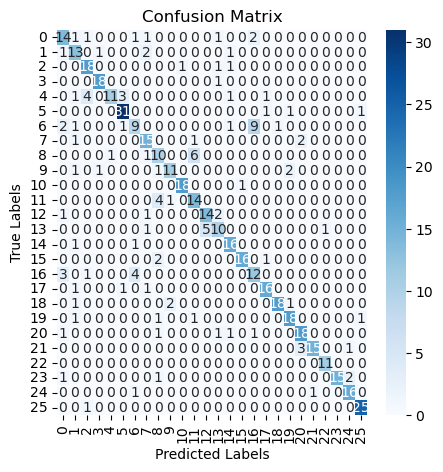

Accuracy: 0.7730769230769231
Precision: 0.7821891099697752
Recall: 0.7730769230769231
F1 Score: 0.7721407633940056


In [47]:
# Predictions on testing data
y_test_pred = best_svm_model.predict(X_test_hog)
conf_mat = (confusion_matrix(y_test, y_test_pred))

# Evaluation Matrix
print("\nGridSearchCV Results (Test Data):")
print("Confusion Matrix:")
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(conf_mat)), yticklabels=range(len(conf_mat)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))

**Make comparison between original images and HOG images**

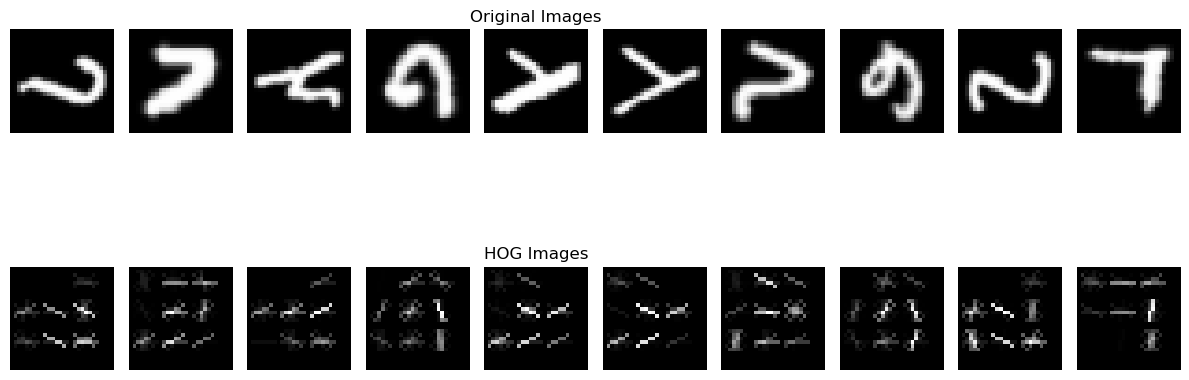

In [48]:
plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 4:
        plt.title('Original Images')
    
    plt.subplot(2, 10, i + 11)
    _, hog_image = hog(X_test[i].reshape(28, 28), 
                       orientations=9, pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2), visualize=True, block_norm='L2')
    plt.imshow(hog_image, cmap='gray')
    plt.axis('off')
    if i == 4:
        plt.title('HOG Images')

plt.tight_layout()
plt.show()